# Data Load

In [34]:
import seaborn as sns
import pandas as pd
data=pd.read_csv("PJT002_train.csv")

C:\Users\kiwon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
pd.set_option('display.max_columns', None)
data.tail()

,dt_of_fr,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,tmprtr,prcpttn,wnd_spd,wnd_drctn,hmdt,gas_engry_us_201401,ele_engry_us_201401,gas_engry_us_201402,ele_engry_us_201402,gas_engry_us_201403,ele_engry_us_201403,gas_engry_us_201404,ele_engry_us_201404,gas_engry_us_201405,ele_engry_us_201405,gas_engry_us_201406,ele_engry_us_201406,gas_engry_us_201407,ele_engry_us_201407,gas_engry_us_201408,ele_engry_us_201408,gas_engry_us_201409,ele_engry_us_201409,gas_engry_us_201410,ele_engry_us_201410,gas_engry_us_201411,ele_engry_us_201411,gas_engry_us_201412,ele_engry_us_201412,gas_engry_us_201501,ele_engry_us_201501,gas_engry_us_201502,ele_engry_us_201502,gas_engry_us_201503,ele_engry_us_201503,gas_engry_us_201504,ele_engry_us_201504,gas_engry_us_201505,ele_engry_us_201505,gas_engry_us_201506,ele_engry_us_201506,gas_engry_us_201507,ele_engry_us_201507,gas_engry_us_201508,ele_engry_us_201508,gas_engry_us_201509,ele_engry_us_201509,gas_engry_us_201510,ele_engry_us_201510,gas_engry_us_201511,ele_engry_us_201511,gas_engry_us_201512,ele_engry_us_201512,gas_engry_us_201601,ele_engry_us_201601,gas_engry_us_201602,ele_engry_us_201602,gas_engry_us_201603,ele_engry_us_201603,gas_engry_us_201604,ele_engry_us_201604,gas_engry_us_201605,ele_engry_us_201605,gas_engry_us_201606,ele_engry_us_201606,gas_engry_us_201607,ele_engry_us_201607,gas_engry_us_201608,ele_engry_us_201608,gas_engry_us_201609,ele_engry_us_201609,gas_engry_us_201610,ele_engry_us_201610,gas_engry_us_201611,ele_engry_us_201611,gas_engry_us_201612,ele_engry_us_201612,gas_engry_us_201701,ele_engry_us_201701,gas_engry_us_201702,ele_engry_us_201702,gas_engry_us_201703,ele_engry_us_201703,gas_engry_us_201704,ele_engry_us_201704,gas_engry_us_201705,ele_engry_us_201705,gas_engry_us_201706,ele_engry_us_201706,gas_engry_us_201707,ele_engry_us_201707,gas_engry_us_201708,ele_engry_us_201708,gas_engry_us_201709,ele_engry_us_201709,gas_engry_us_201710,ele_engry_us_201710,gas_engry_us_201711,ele_engry_us_201711,gas_engry_us_201712,ele_engry_us_201712,gas_engry_us_201801,ele_engry_us_201801,gas_engry_us_201802,ele_engry_us_201802,gas_engry_us_201803,ele_engry_us_201803,gas_engry_us_201804,ele_engry_us_201804,gas_engry_us_201805,ele_engry_us_201805,gas_engry_us_201806,ele_engry_us_201806,gas_engry_us_201807,ele_engry_us_201807,gas_engry_us_201808,ele_engry_us_201808,gas_engry_us_201809,ele_engry_us_201809,gas_engry_us_201810,ele_engry_us_201810,gas_engry_us_201811,ele_engry_us_201811,gas_engry_us_201812,ele_engry_us_201812,lw_13101010,lw_13101110,lw_13101210,lw_13101211,lw_13101310,lw_13101410,lw_13111010,lw_13111110,lw_13121010,lw_13121011,lw_13131010,lw_13131110,lw_13141010,lw_13141011,jmk,id,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm,emd_nm,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,mlt_us_yn,cctv_dstnc,fr_wthr_fclt_in_100m,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,trgt_crtr,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn
59194,2016-12-03 14:25,N,동.식물 관련시설,경량철골구조,2,423.000,423.0000,3010.0,1.99612e+07,NaN,NaN,NaN,11.2,NaN,0.2,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,목,91817,계획관리지역,지정되지않음,주거기타,세로한면(가),경상남도 함안군 칠원읍,20955.0,3435,NaN,895,139.0,N,1131,0,0,3591,3624,6679,914,0,일반대상물,N,N,Y,N,N,N,N
59195,2016-10-29 10:10,N,NaN,NaN,35,5593.711,54835.0382,0.0,NaN,171.0,0.0,NaN,14.8,

In [36]:
data.shape

(59199, 180)

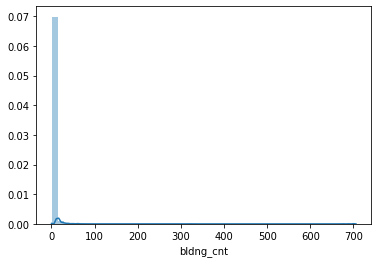

In [37]:
sns.distplot(data['bldng_cnt'])

In [39]:
from pandas import DataFrame as df
a=data.isnull().sum()
test=df(data={'sum':a})

In [125]:
b=data.isnull().sum()/data.shape[0]
test1=df(data={'sum_ratio':b})

In [128]:
pd.options.display.max_rows = 4000
test1=test1.sort_values(by=['sum_ratio'], axis=0,ascending=False)
test1

,sum_ratio
prcpttn,0.905911
trgt_crtr,0.861873
fr_fghtng_fclt_spcl_css_5_yn,0.857481
fr_fghtng_fclt_spcl_css_6_yn,0.857481
dngrs_thng_yn,0.835267
us_yn,0.835267
cltrl_hrtg_yn,0.835267
slf_fr_brgd_yn,0.835267
blk_dngrs_thng_mnfctr_yn,0.835267
bldng_us_clssfctn,0.495667


In [77]:
pd.options.display.max_rows = 4000
test=test.sort_values(by=['sum'], axis=0,ascending=False)


lw~ column 전부 결측치가 58000개 이상이므로 삭제 

In [53]:
for i in data.columns:
    if 'lw_' in i:
        del data[i]

prcpttn, trgt_crtr, fr_fghtng_fclt_spcl_css_6_yn, fr_fghtng_fclt_spcl_css_5_yn,  
cltrl_hrtg_yn, dngrs_thng_yn, slf_fr_brgd_yn, blk_dngrs_thng_mnfctr_yn, us_yn   
49000이상 (83% 이상의 너무 많은 결측치로 삭제함)

In [101]:
test.head(3)

,sum
order,
lw_13121011,58926
lw_13121010,58926
lw_13111110,58918


In [100]:
# for i in data.columns:
    tbc_rtl_str_dstnc

0         True
1         True
2        False
3         True
4         True
         ...  
59194     True
59195     True
59196     True
59197     True
59198     True
Name: tbc_rtl_str_dstnc, Length: 59199, dtype: bool

In [124]:
test['sum']>data.shape[0]*0.8

order
lw_13121011                      True
lw_13121010                      True
lw_13111110                      True
lw_13101410                      True
lw_13101110                      True
lw_13141011                      True
lw_13141010                      True
lw_13101310                      True
lw_13131010                      True
lw_13131110                      True
lw_13101210                      True
lw_13101211                      True
lw_13111010                      True
lw_13101010                      True
prcpttn                          True
trgt_crtr                        True
fr_fghtng_fclt_spcl_css_6_yn     True
fr_fghtng_fclt_spcl_css_5_yn     True
cltrl_hrtg_yn                    True
dngrs_thng_yn                    True
slf_fr_brgd_yn                   True
blk_dngrs_thng_mnfctr_yn         True
us_yn                            True
bldng_us_clssfctn               False
bldng_us                        False
bldng_archtctr                  False
ele_en

In [123]:
data.shape[0]

59199

In [129]:
data.corr()

,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,ttl_grnd_flr,ttl_dwn_flr,tmprtr,prcpttn,wnd_spd,wnd_drctn,hmdt,gas_engry_us_201401,ele_engry_us_201401,gas_engry_us_201402,ele_engry_us_201402,gas_engry_us_201403,ele_engry_us_201403,gas_engry_us_201404,ele_engry_us_201404,gas_engry_us_201405,ele_engry_us_201405,gas_engry_us_201406,ele_engry_us_201406,gas_engry_us_201407,ele_engry_us_201407,gas_engry_us_201408,ele_engry_us_201408,gas_engry_us_201409,ele_engry_us_201409,gas_engry_us_201410,ele_engry_us_201410,gas_engry_us_201411,ele_engry_us_201411,gas_engry_us_201412,ele_engry_us_201412,gas_engry_us_201501,ele_engry_us_201501,gas_engry_us_201502,ele_engry_us_201502,gas_engry_us_201503,ele_engry_us_201503,gas_engry_us_201504,ele_engry_us_201504,gas_engry_us_201505,ele_engry_us_201505,gas_engry_us_201506,ele_engry_us_201506,gas_engry_us_201507,ele_engry_us_201507,gas_engry_us_201508,ele_engry_us_201508,gas_engry_us_201509,ele_engry_us_201509,gas_engry_us_201510,ele_engry_us_201510,gas_engry_us_201511,ele_engry_us_201511,gas_engry_us_201512,ele_engry_us_201512,gas_engry_us_201601,ele_engry_us_201601,gas_engry_us_201602,ele_engry_us_201602,gas_engry_us_201603,ele_engry_us_201603,gas_engry_us_201604,ele_engry_us_201604,gas_engry_us_201605,ele_engry_us_201605,gas_engry_us_201606,ele_engry_us_201606,gas_engry_us_201607,ele_engry_us_201607,gas_engry_us_201608,ele_engry_us_201608,gas_engry_us_201609,ele_engry_us_201609,gas_engry_us_201610,ele_engry_us_201610,gas_engry_us_201611,ele_engry_us_201611,gas_engry_us_201612,ele_engry_us_201612,gas_engry_us_201701,ele_engry_us_201701,gas_engry_us_201702,ele_engry_us_201702,gas_engry_us_201703,ele_engry_us_201703,gas_engry_us_201704,ele_engry_us_201704,gas_engry_us_201705,ele_engry_us_201705,gas_engry_us_201706,ele_engry_us_201706,gas_engry_us_201707,ele_engry_us_201707,gas_engry_us_201708,ele_engry_us_201708,gas_engry_us_201709,ele_engry_us_201709,gas_engry_us_201710,ele_engry_us_201710,gas_engry_us_201711,ele_engry_us_201711,gas_engry_us_201712,ele_engry_us_201712,gas_engry_us_201801,ele_engry_us_201801,gas_engry_us_201802,ele_engry_us_201802,gas_engry_us_201803,ele_engry_us_201803,gas_engry_us_201804,ele_engry_us_201804,gas_engry_us_201805,ele_engry_us_201805,gas_engry_us_201806,ele_engry_us_201806,gas_engry_us_201807,ele_engry_us_201807,gas_engry_us_201808,ele_engry_us_201808,gas_engry_us_201809,ele_engry_us_201809,gas_engry_us_201810,ele_engry_us_201810,gas_engry_us_201811,ele_engry_us_201811,gas_engry_us_201812,ele_engry_us_201812,id,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,cctv_dstnc,fr_wthr_fclt_in_100m,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m
bldng_cnt,1.000000,0.530414,0.189012,0.443320,0.454254,0.472871,0.001480,0.040916,-0.006141,-0.008261,-0.004482,0.045279,0.027010,0.048705,0.027912,0.047827,0.027317,0.049499,2.633699e-02,0.044077,0.026339,0.057032,0.026050,0.024990,0.025854,0.483188,0.028493,0.244194,0.041096,0.054676,0.048429,0.372101,0.170631,0.405959,0.254004,0.469401,0.378547,0.611233,0.586937,0.610758,0.605433,0.611123,0.605710,0.611347,0.605272,0.609871,0.608002,0.606878,0.608106,0.604378,0.608107,0.608461,0.608655,0.607209,0.604457,0.595013,0.606328,0.568165,0.606119,0.568533,0.584649,0.457220,0.576222,0.490115,0.586352,0.513663,0.581308,0.469229,0.573766,0.474270,0.599417,0.415748,0.164698,0.485681,0.166515,0.485025,0.164375,0.424529,0.166160,0.362943,0.158658,0.365429,0.167498,0.335356,0.169129,0.233724,0.169164,0.485309,0.222857,0.230018,0.219313,0.431879,0.217658,0.523563,0.228024,0.559517,0.246654,0.601134,0.247145,0.592333,0.235804,0.566329,0.226331,0.580599,0.230293,0.532755,0.235267,0.443335,0.230642,0.382536,0.226745,0.462632,0.230153,4.212217e-01,0.227880,0.396052,0.226819,0.510780,0.241607,0.565139,0.237435,0.602033,0.239316,0.596792,0.239578,0.576231,0.229660,0.565943,0.232447,0.535647,0.236405,-0.001038,-0.014117,0.009314,-0.056682,-0.014234,-0.012466,0.010925,-0.051694,-0.066528,0.019226,-0.011281,-0